Computer Experiments with Driven Damped Pendulum
===

(Worked Examples for Chapt. 12 J. Taylor, "Classical Mechanics)





In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plot
import numpy as np

The driven damped pendulum has the equation:
$$ \ddot \phi = \gamma \omega_0^2 \cos\omega t - 2\beta \dot\phi - \omega_0^2 \sin\phi $$

with:<br>
$\omega = 2\pi$ -- the frequency of the driving force<br>
$\omega_0 = 1.5\omega$ -- the natural frequency of the pendulum<br>
$\beta = \omega_0/4$ -- the damping parameter in frequency units<br>
$\gamma$ -- the strength of the driving force

In [2]:
def ddp(y, t, gamma):
    dydt = [y[1], gamma*omega0**2*np.cos(omega*t) - 2*beta*y[1] - omega0**2*np.sin(y[0])]
    return dydt

The second order equation is numerically solved as a pair of first order equations with unknown function ${\bf y}(t) = [\phi(t), \dot\phi(t)]$ and initial conditions ${\bf y}_0 = [\phi(0) = 0, \dot\phi(0) = 0)]$, over the time range $t = 0,\ldots, 10$.

In [3]:
omega = 2*np.pi; omega0 = 1.5*omega; beta = omega0/4;
y0 = [0.0, 0.0]
t = np.linspace(0,10,401)

For weak driving force $\gamma = 0.2$ the small angle approximation $\sin\phi\approx \phi$ holds and the equation is linear inhomogenous with solution:
$$ \phi(t) = c_1 \phi_1(t) + c_2 \phi_2(t) + \phi_p(t)$$
where $\phi_1$ and $\phi_2$ are general solutions of the homogenous free damped oscillator, and $\phi_p = A \cos(\omega t - \delta)$ is a particular solution.

Since $\phi_{1,2}$ decrease exponentially to zero after about 3 periods, $\phi_p(t)$, with a period of 1, dominates.

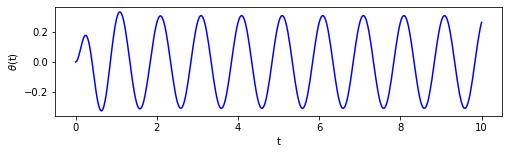

In [4]:
gamma = 0.2
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

In [5]:
y0 = [0.0, -5.6]

No matter what other initial conditions $y_0$ are used, solutions tends to be "attracted" towards $\phi_p(t)$

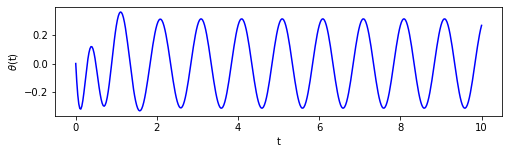

In [6]:
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

In [7]:
y0 = [0.0, 0.0];gamma = 0.9

For a, stronger driving force $\gamma=0.9$, higher harmonics may contribute, but since the pendulum is still in a linear regime, the main period remains the same.

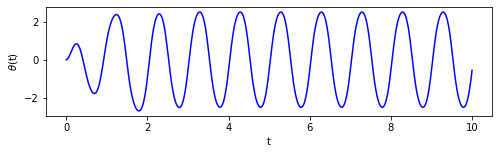

In [8]:
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

For $\gamma=1.06$ the pendulum has enough energy to start rolling, but eventually settles to a period 1 motion

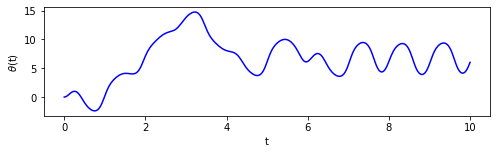

In [9]:
gamma = 1.06
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

We can integrate for a longer time and look at the solution at succesive 1-period intervals: 
$\phi(t_0), \phi(t_0 + 1), \phi(t_0 + 2), \ldots$, for large enough $t_0$. Here $t_0 = 20$.

In [10]:
t = np.linspace(0,30,601)
sol = odeint(ddp, y0, t, args=(gamma,))

In [11]:
print(t[400:500:20])
print(sol[400:500:20,0])

[20. 21. 22. 23. 24.]
[6.03528732 6.03764785 6.03582424 6.037238   6.0361452 ]


For $\gamma = 1.073$, after wild initial oscillations for nearly 20 periods, the system eventually settles to a sinusoidal attractor. Although far from small angle regime, we still expect that the transient solutions to die off with 2-3 periods.

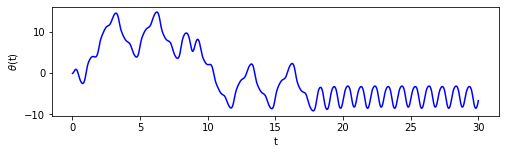

In [12]:
gamma = 1.073
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

Solution at equal unit interval shows alternating values of 6.64 and 6.4, revealing a periodic motion of period 2. These are **subharmonic** because they are fractions of the driving frequency $\omega/n$. The subharmonic contribution is rather small, oscillations with the principal harmonic is still dominant.

In [13]:
print(t[400:500:20])
print(sol[400:500:20,0])

[20. 21. 22. 23. 24.]
[-6.63121402 -6.40584775 -6.65635438 -6.40913895 -6.64303694]


For stronger $\gamma=1.077$ motion settles down to an attractor with period 3.

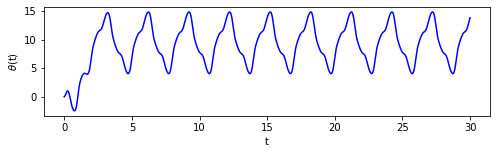

In [14]:
gamma = 1.077
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

Printing the solution at unit interval confirms the period 3.

In [15]:
print(t[400:500:20])
print(sol[400:500:20,0])

[20. 21. 22. 23. 24.]
[ 6.87263576 13.81225178  7.75853934  6.87264408 13.8122507 ]


In [16]:
print(t[500:600:20])
print(sol[500:600:20,0])

[25. 26. 27. 28. 29.]
[ 7.75853696  6.87264781 13.81225003  7.75853583  6.87264955]


Solutions starting at different initial conditions end up in a different attractor, although for a few oscillations they go to the same attractor.

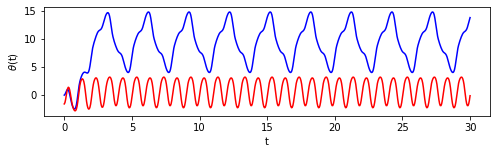

In [17]:
y0 = [-np.pi/2, 0.0]
sol2 = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b', t, sol2[:,0],'r')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

As $\gamma$ changes from 1.06 to 1.0826, the system goes through a period-doubling cascade. After the transients dissapear, the motion settles to a steady oscillation with a period that is a power of 2 multiple of the period of the driving force. The motion seems to be very similar, but on closer inspection, the maxima and minima are not of the same height. The period-doubling cascade are observed in many nonlinear systems.

The critical strength at which the doubling happens are $\gamma_1 = 1.0663$, $\gamma_2 = 1.0793$, $\gamma_3 = 1.0821$ and $\gamma_4 = 1.0827$. The differences $\gamma_{n+1} - \gamma_n$ decrease in geometric progression such that the ratio $\delta = (\gamma_{n} - \gamma_{n-1})/(\gamma_{n+1} - \gamma_n)$ is constant. Mitchell Feigenbaum discovered that this constant $\delta  = 4.6692016$ is **universal** for all period-doubling phenomena.

The thresholds $\gamma_n$ themselves approach a finite limit $\gamma_c = 1.0829$, beyond which periodicity dissapears and chaos sets in.

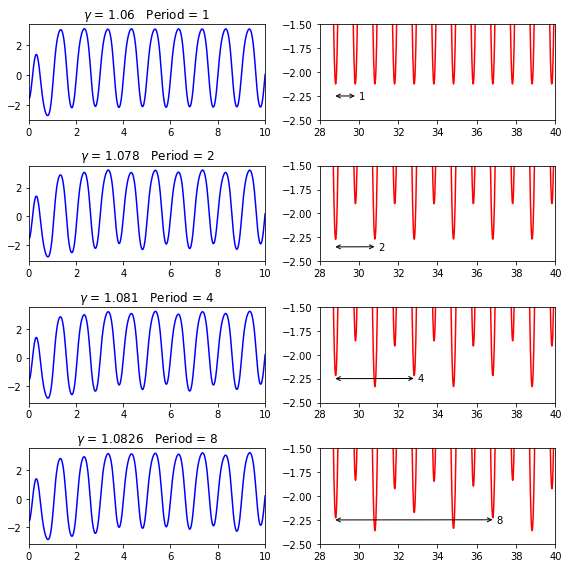

In [18]:
t = np.linspace(0,40,2401)
fig, ax = plot.subplots(4,2, figsize=(8,8))
sol = odeint(ddp, y0, t, args=(1.06,));
ax[0,0].set_title(r'$\gamma$ = 1.06   Period = 1')
ax[0,0].set_xlim(0,10)
ax[0,0].plot(t, sol[:, 0],'b')
ax[0,1].set_xlim(28,40); ax[0,1].set_ylim(-2.5,-1.5)
ax[0,1].plot(t, sol[:, 0],'r')
ax[0,1].annotate("1", xy=(28.7,-2.25), xytext=(30,-2.28),arrowprops=dict(arrowstyle="<->"))
sol = odeint(ddp, y0, t, args=(1.078,));
ax[1,0].set_title(r'$\gamma$ = 1.078   Period = 2')
ax[1,0].set_xlim(0,10)
ax[1,0].plot(t, sol[:, 0],'b')
ax[1,1].set_xlim(28,40); ax[1,1].set_ylim(-2.5,-1.5)
ax[1,1].plot(t, sol[:, 0],'r')
ax[1,1].annotate("2", xy=(28.7,-2.35), xytext=(31,-2.38),arrowprops=dict(arrowstyle="<->"))
sol = odeint(ddp, y0, t, args=(1.081,));
ax[2,0].set_title(r'$\gamma$ = 1.081   Period = 4')
ax[2,0].set_xlim(0,10)
ax[2,0].plot(t, sol[:, 0],'b')
ax[2,1].set_xlim(28,40); ax[2,1].set_ylim(-2.5,-1.5)
ax[2,1].plot(t, sol[:, 0],'r')
ax[2,1].annotate("4", xy=(28.7,-2.25), xytext=(33,-2.28),arrowprops=dict(arrowstyle="<->"))
sol = odeint(ddp, y0, t, args=(1.0826,));
ax[3,0].set_title(r'$\gamma$ = 1.0826   Period = 8')
ax[3,0].set_xlim(0,10)
ax[3,0].plot(t, sol[:, 0],'b')
ax[3,1].set_xlim(28,40); ax[3,1].set_ylim(-2.5,-1.5)
ax[3,1].plot(t, sol[:, 0],'r')
ax[3,1].annotate("8", xy=(28.7,-2.25), xytext=(37,-2.28),arrowprops=dict(arrowstyle="<->"))
fig.tight_layout()
plot.show()

For $\gamma = 1.105$ motion seems erratic and there is no apparent periodicity.

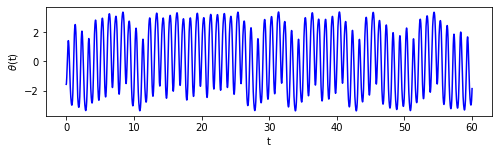

In [19]:
t = np.linspace(0,60,2401)
gamma = 1.105
sol = odeint(ddp, y0, t, args=(gamma,));
fig, ax = plot.subplots(figsize=(8,2))
ax.plot(t, sol[:, 0],'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\theta$(t)')
plot.show()

Another sign of chaos is to look at the evolution of solutions that start at slightly different initial conditions. For weak forced oscillations, the difference $\Delta\phi(t) = \phi_2(t) - \phi_1(t)$ decreases exponentially with time, because in the linear regime, solutions are attracted to the particular solution $\phi_p(t)$, after the exponentially decaying transients dissapear. The log plot is linear with negative slope.

The *linear forced oscillator* is insensitive to its initial conditions. Uncertainty in the initial conditions does not propagate in time.

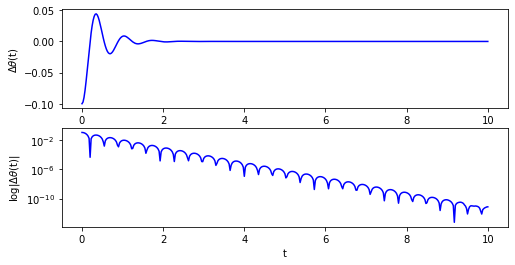

In [20]:
gamma=0.1
t = np.linspace(0,10,401)
y0 = [0.0, 0.0]
sol1 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-11, atol=1.e-11);
y0 = [0.1, 0.0]
sol2 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-11, atol=1.e-11);
fig, ax = plot.subplots(2,1, figsize=(8,4))
ax[0].plot(t, sol1[:, 0] - sol2[:,0], 'b')
ax[0].set_xlabel("t");ax[0].set_ylabel(r'$\Delta\theta$(t)')
ax[1].semilogy(t, abs(sol1[:, 0] - sol2[:,0]), 'b')
ax[1].set_xlabel("t");ax[1].set_ylabel(r'$\log|\Delta\theta$(t)|')
plot.show()

As long as $\gamma < \gamma_c$, and the initial conditions are close enough, $\Delta\phi$ continues to decrease, although at slower rate.

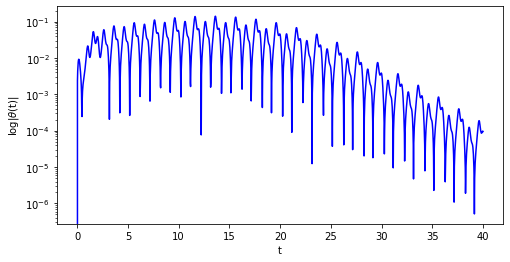

In [21]:
gamma=1.07
t = np.linspace(0,40,1601)
y0 = [-np.pi/2, 0.0]
sol1 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-12, atol=1.e-15);
y0 = [-np.pi/2, 0.1]
sol2 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-12, atol=1.e-15);
fig, ax = plot.subplots(figsize=(8,4))
ax.semilogy(t, abs(sol1[:, 0] - sol2[:,0]), 'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\log|\theta$(t)|')
plot.show()

Solutions for $\gamma = 1.07$, started with $\dot\phi_1 = 0$ and $\dot\phi_2 = 0.1$ are indistinguishable.

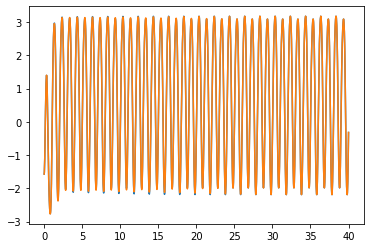

In [22]:
plot.plot(t, sol1[:,0],t, sol2[:,0]);

For $\gamma$ past the critical value $\gamma_c = 1.0829$, $\Delta\phi$ grows exponentially, even when initial values differ by $10^{-3}$.

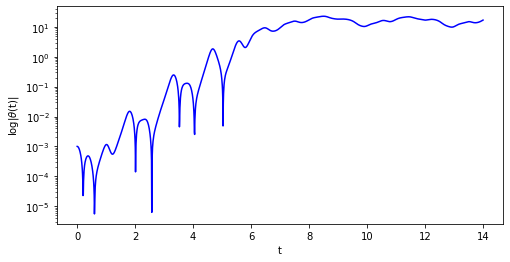

In [23]:
gamma=1.105
t = np.linspace(0,14,1601)
y0 = [0, 0]
sol1 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
y0 = [1.e-3,0]
sol2 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
fig, ax = plot.subplots(figsize=(8,4))
ax.semilogy(t, abs(sol1[:, 0] - sol2[:,0]), 'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\log|\theta$(t)|')
plot.show()

Solutions start almost on the same way, but eventually diverge to totally different trajectories. Reliable preditions of chaotic motion is impossible due to **extreme sensitivity to initial conditions**. 

A measure of this effect is given by the slope in the log plot of $\Delta\phi$. The **Liapunov** exponent $\lambda$ characterizes the growth of differences in initial conditions as $$\Delta\phi(t) \approx K e^{\lambda t}$$

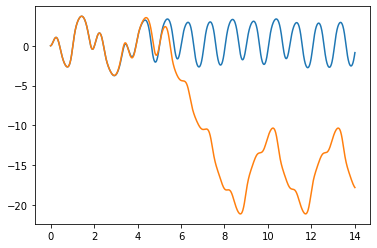

In [24]:
plot.plot(t, sol1[:,0],t, sol2[:,0]);

As $\gamma$ increases, regular nonchaotic motion re-emerges.

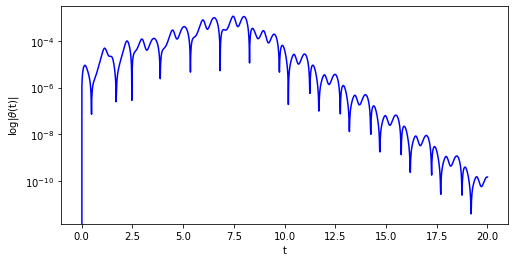

In [25]:
gamma = 1.13
t = np.linspace(0,20,1601)
y0 = [-np.pi/2, 0.0]
sol1 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
y0 = [-np.pi/2, 1.e-4]
sol2 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
fig, ax = plot.subplots(figsize=(8,4))
ax.semilogy(t, abs(sol1[:, 0] - sol2[:,0]), 'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\log|\theta$(t)|')
plot.show()

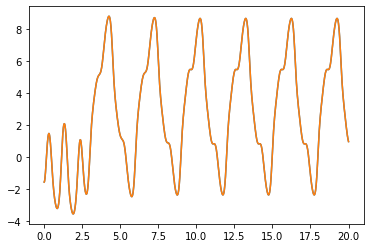

In [26]:
plot.plot(t, sol1[:,0],t, sol2[:,0]);

For $\gamma = 1.503$ the system returns to chaos

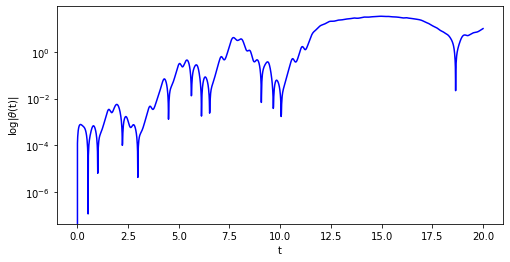

In [27]:
gamma=1.503
t = np.linspace(0,20,1601)
y0 = [0.0, 0.0]
sol1 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
y0 = [0.0, 1.e-2]
sol2 = odeint(ddp, y0, t, args=(gamma,), rtol=1.e-13, atol=1.e-15);
fig, ax = plot.subplots(figsize=(8,4))
ax.semilogy(t, abs(sol1[:, 0] - sol2[:,0]), 'b')
ax.set_xlabel("t");ax.set_ylabel(r'$\log|\theta$(t)|')
plot.show()

The system has enough energy to roll over the top many times. Two orbits initialy separated by 0.01 start almost indistinguishable, but diverge in radically different motions after 10 periods.

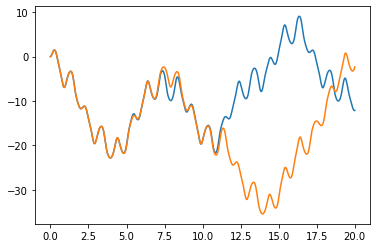

In [28]:
plot.plot(t, sol1[:,0],t, sol2[:,0]);

A **bifurcation diagram** shows periodically sampled solutions $\phi(t_0),\phi(t_0+1),\ldots$ for increasing strength of the driving force $\gamma$, for systems started with the same initial conditions $[\phi(t=0) = -\pi/2, \dot\phi(t=0) = 0]$. After enough time $t_0$, the transients dissapear and, if the motion is periodic, those points accumulate at positions showing the periodicity. Bifurcations mark the points where the number of periods doubles.

In [29]:
y0 = [-np.pi/2, 0.0]
t = np.arange(0, 540,1)
g = np.arange(1.0600,1.0869,1.e-4)
G = np.broadcast_to(g,(100, g.size)).T
Y = np.empty((g.size, 100))
for k in range(g.size):
    sol = odeint(ddp, y0, t, args=(G[k,0],));
    Y[k] = sol[420:520,0]

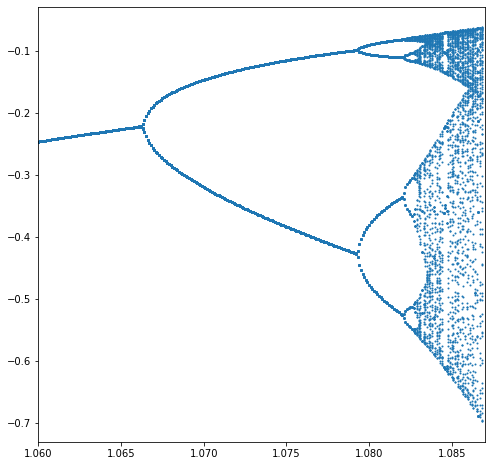

In [30]:
fig, ax = plot.subplots(figsize=(8,8))
ax.scatter(G.flatten(),Y.flatten(),s=1)
ax.set_xlim(1.06,1.087)
plot.show()

In [31]:
y0 = [-np.pi/2, 0.0]
t = np.arange(0, 240,1)
g = np.arange(1.06,1.55,1.e-3)
G = np.broadcast_to(g,(100, g.size)).T
Y = np.empty((g.size, 100))
for k in range(g.size):
    sol = odeint(ddp, y0, t, args=(G[k,0],));
    Y[k] = sol[140:240,0]

In [32]:
def ur(S):
    return S - np.floor((S-np.pi)/(2*np.pi))*2*np.pi - 2*np.pi

With carefull folding of the angle in the $[-\pi, \pi]$ interval, the bifurcation diagram for higher $\gamma$'s shows alternating regular and chaos regions.

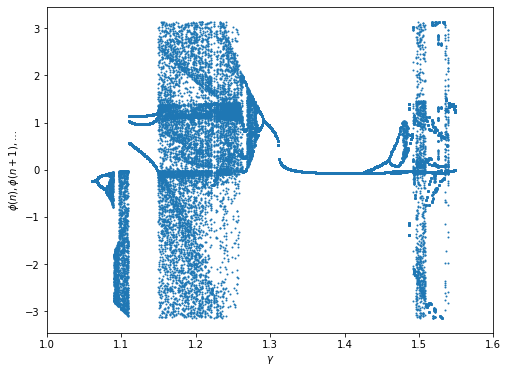

In [33]:
fig, ax = plot.subplots(figsize=(8,6))
ax.scatter(G.flatten(),ur(Y.flatten()),s=1)
ax.set_xlim(1.0,1.6)
ax.set_xlabel("$\gamma$"); ax.set_ylabel("$\phi(n), \phi(n+1), \ldots$")
plot.show()

**Poincar&eacute; Sections** show periodically sampled points from the phase space $(\phi, \dot\phi)$ orbit of the system. For a regular periodic trajectory the Poincar&eacute; section shows a point, two points, four points, etc, depending on the number of subharmonic periods of the attractor. After a multiple of the period of the driving force, the system revisits one of the previous points.

Poincar&eacute; sections for a chaotic systems show densely populated manifolds, if trajectories are followed for long enough times. These manifolds have a **fractal** structure.

In [34]:
t = np.arange(0, 40000,1)
sol = odeint(ddp, y0, t, args=(1.5,))

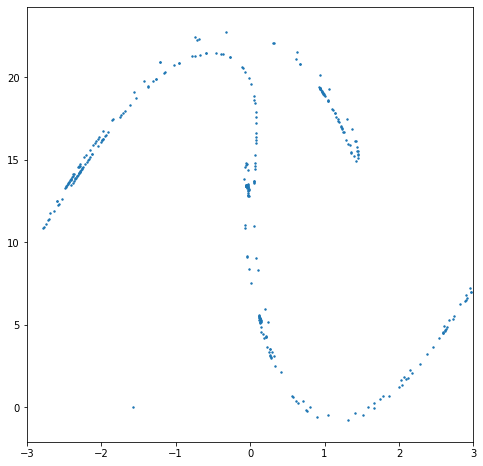

In [35]:
fig, ax = plot.subplots(figsize=(8,8))
ax.scatter(sol.T[0],sol.T[1],s=2)
ax.set_xlim(-3,3)
plot.show()